<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_25_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv', header = None, usecols = [0,1,2])
df.columns = ['Label','Alcohol','Malic_acid']

In [3]:
df

,Label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

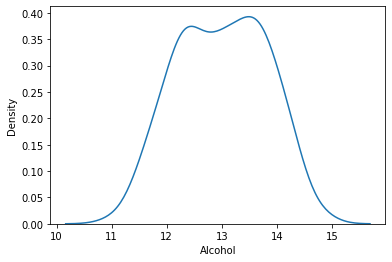

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic_acid', ylabel='Density'>

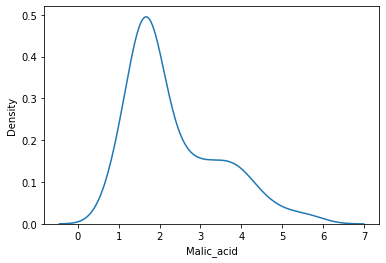

In [5]:
sns.kdeplot(df['Malic_acid'])

<Axes: xlabel='Malic_acid', ylabel='Alcohol'>

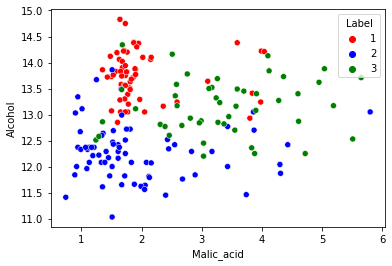

In [6]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(data = df, y = 'Alcohol', x = 'Malic_acid', hue = 'Label',palette = color_dict)

# **Spliting the dataset**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Alcohol','Malic_acid']], df['Label'],test_size = 0.25, random_state = 42)

print(x_train.shape, x_test.shape)

(133, 2) (45, 2)


# Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(x_train)

MinMaxScaler()

In [21]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_train.columns)

In [23]:
x_train.describe()

,Alcohol,Malic_acid
count,133.000000,133.000000
mean,12.972857,2.386842
std,0.829993,1.098905
min,11.030000,0.890000
25%,12.290000,1.640000
50%,12.990000,1.900000
75%,13.690000,3.170000
max,14.830000,5.800000


In [25]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic_acid
count,133.0,133.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

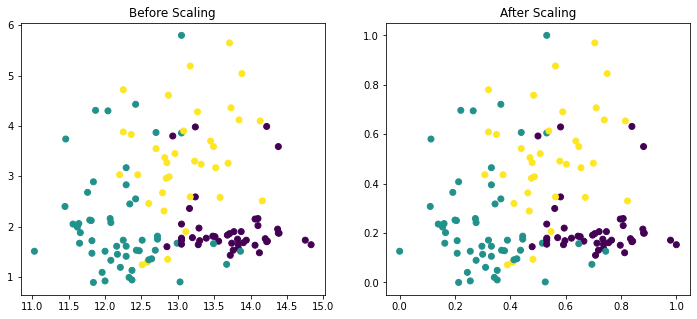

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic_acid'], c = y_train)
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic_acid'], c = y_train)
ax2.set_title('After Scaling')

Exact same distribution before and after scaling. The original shape of the data is retained.

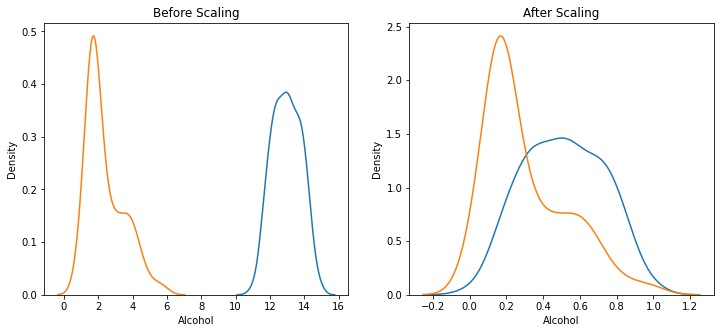

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax = ax1)
sns.kdeplot(x_train['Malic_acid'],ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax = ax2)
sns.kdeplot(x_train_scaled['Malic_acid'],ax = ax2)
plt.show()

# Modelling

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model1 = LogisticRegression()
model2 = LogisticRegression()

In [43]:
model.fit(x_train, y_train)
model1.fit(x_train_scaled, y_train)

LogisticRegression()

In [44]:
x_test.describe()

,Alcohol,Malic_acid
count,45.000000,45.000000
mean,13.082667,2.187111
std,0.758516,1.169259
min,11.410000,0.740000
25%,12.370000,1.350000
50%,13.340000,1.730000
75%,13.630000,2.810000
max,14.340000,5.510000


In [45]:
pred = model.predict(x_test)
pred1 = model1.predict(x_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, pred1))

0.7555555555555555
0.7555555555555555
